# Install libraries

In [1]:
!pip install scipy seaborn scikit-learn

# Import Libraries

In [2]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization (based on matplotlib)
from scipy import stats  # For scientific and technical computing (e.g., hypothesis testing) # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For performing linear regression
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating regression models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset

In [3]:
data=pd.read_csv("pollution_us_2000_2016.csv")

# Data Inspection

In [4]:
# Display the first few rows of the dataset
data.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [5]:
data.shape

(1746661, 29)

In [6]:
# basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [7]:
# Display summary statistics of the dataset
data.describe() #(mean, median, min, max, etc.)

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [8]:
# Check for missing values
data.isnull().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

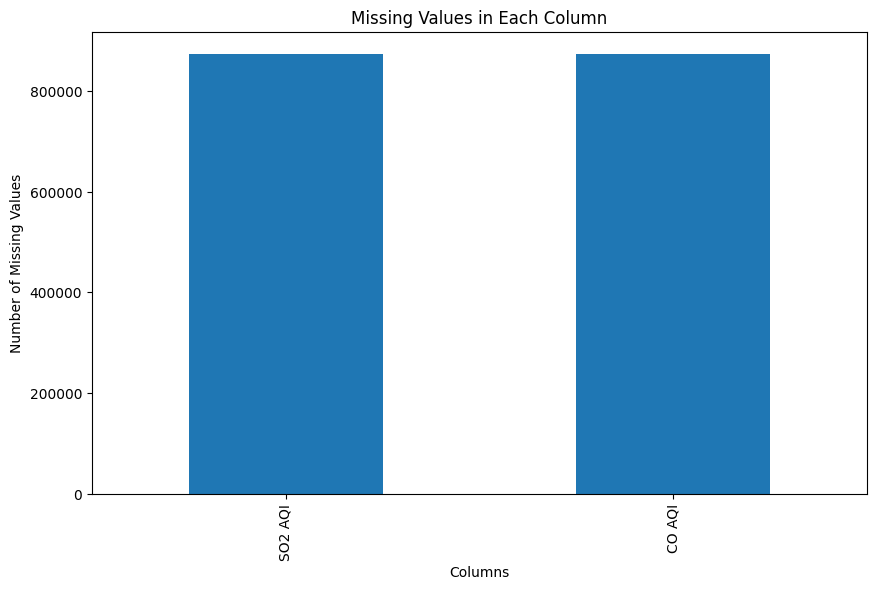

In [9]:
# Calculate the missing values
missing_values = data.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Plot the missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()


In [10]:
data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

# Data Cleaning

In [11]:
# Drop the unnecessary 'Unnamed: 0' column (it's just the index)
data_cleaned=data.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
#check duplicates
data.duplicated().sum()

5032

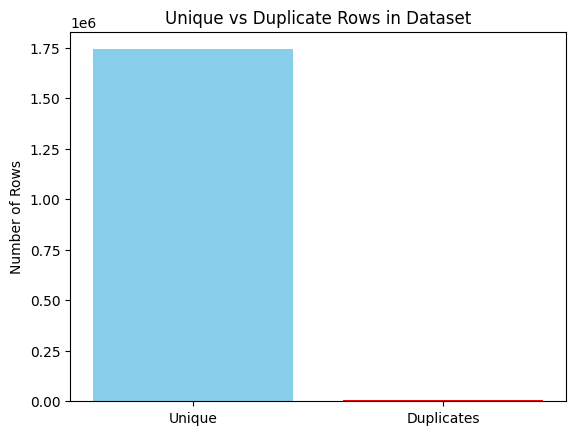

In [13]:
# Calculate unique and duplicate counts
unique_rows = len(data) - data.duplicated().sum()
duplicate_rows = data.duplicated().sum()

# Bar plot
plt.bar(['Unique', 'Duplicates'], [unique_rows, duplicate_rows], color=['skyblue', 'red'])
plt.ylabel('Number of Rows')
plt.title('Unique vs Duplicate Rows in Dataset')
plt.show()


In [14]:
#drop duplicate rows
data_cleaned=data.drop_duplicates()

In [15]:
data_cleaned = data_cleaned.copy()
data_cleaned['SO2 AQI'] = data_cleaned['SO2 AQI'].fillna(data_cleaned['SO2 AQI'].mean())  
data_cleaned['CO AQI'] = data_cleaned['CO AQI'].fillna(data_cleaned['CO AQI'].mean()) 

In [16]:
data_cleaned.shape

(1741629, 28)

In [17]:
data_cleaned.isnull().sum()

State Code           0
County Code          0
Site Num             0
Address              0
State                0
County               0
City                 0
Date Local           0
NO2 Units            0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Units             0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Units            0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Units             0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

In [18]:
# Convert 'Date Local' to datetime and set as index
data_cleaned['Date Local'] = pd.to_datetime(data_cleaned['Date Local'])  #handle the Categorical data and conversion of datetime
data.set_index('Date Local', inplace=True)
# check data types
print(data_cleaned.dtypes)

State Code                    int64
County Code                   int64
Site Num                      int64
Address                      object
State                        object
County                       object
City                         object
Date Local           datetime64[ns]
NO2 Units                    object
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour              int64
NO2 AQI                       int64
O3 Units                     object
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour               int64
O3 AQI                        int64
SO2 Units                    object
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour              int64
SO2 AQI                     float64
CO Units                     object
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour               int64
CO AQI                      

# Data Visualization:

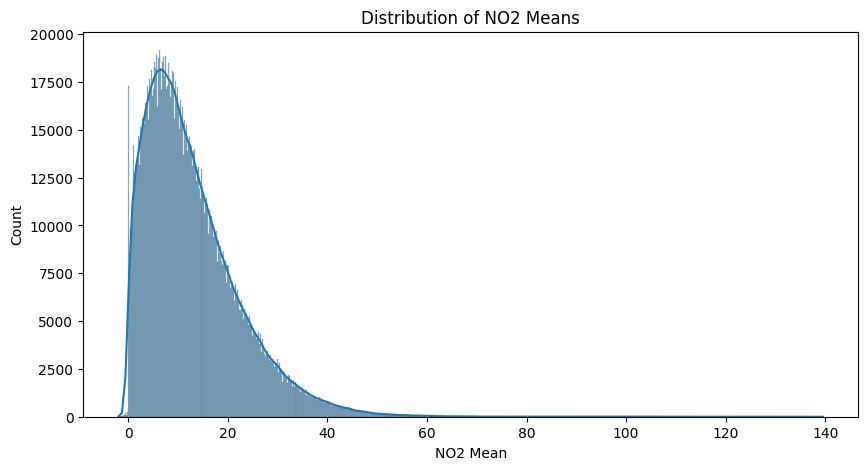

In [19]:
# Plot Distribution of NO2 Means
plt.figure(figsize=(10, 5))
sns.histplot(data=data_cleaned, x='NO2 Mean' ,kde=True)
plt.title('Distribution of NO2 Means')
plt.show()

The distribution of NO2 mean values appears to be right-skewed.

The majority of observations fall within the range of NO2 mean values between 10 and 20.

The combination of the histogram and KDE plot effectively visualizes the density of the data, providing insights into the distribution that are not apparent from the histogram alone.

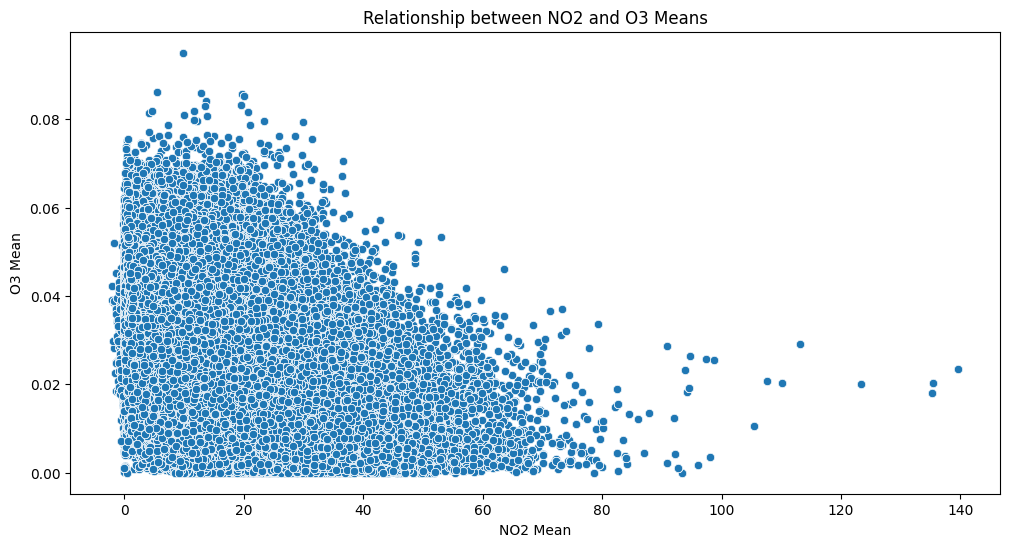

In [20]:
## Scatter Plot: Relationship between NO2 and O3 Means
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_cleaned, x='NO2 Mean', y='O3 Mean')
plt.title('Relationship between NO2 and O3 Means')
plt.xlabel('NO2 Mean')
plt.ylabel('O3 Mean')
plt.show()

The graph clearly shows an inverse or negative correlation between the NO2 mean and O3 mean values.

As the NO2 mean increases, the O3 mean tends to decrease, and vice versa.

# Grouped Analysis

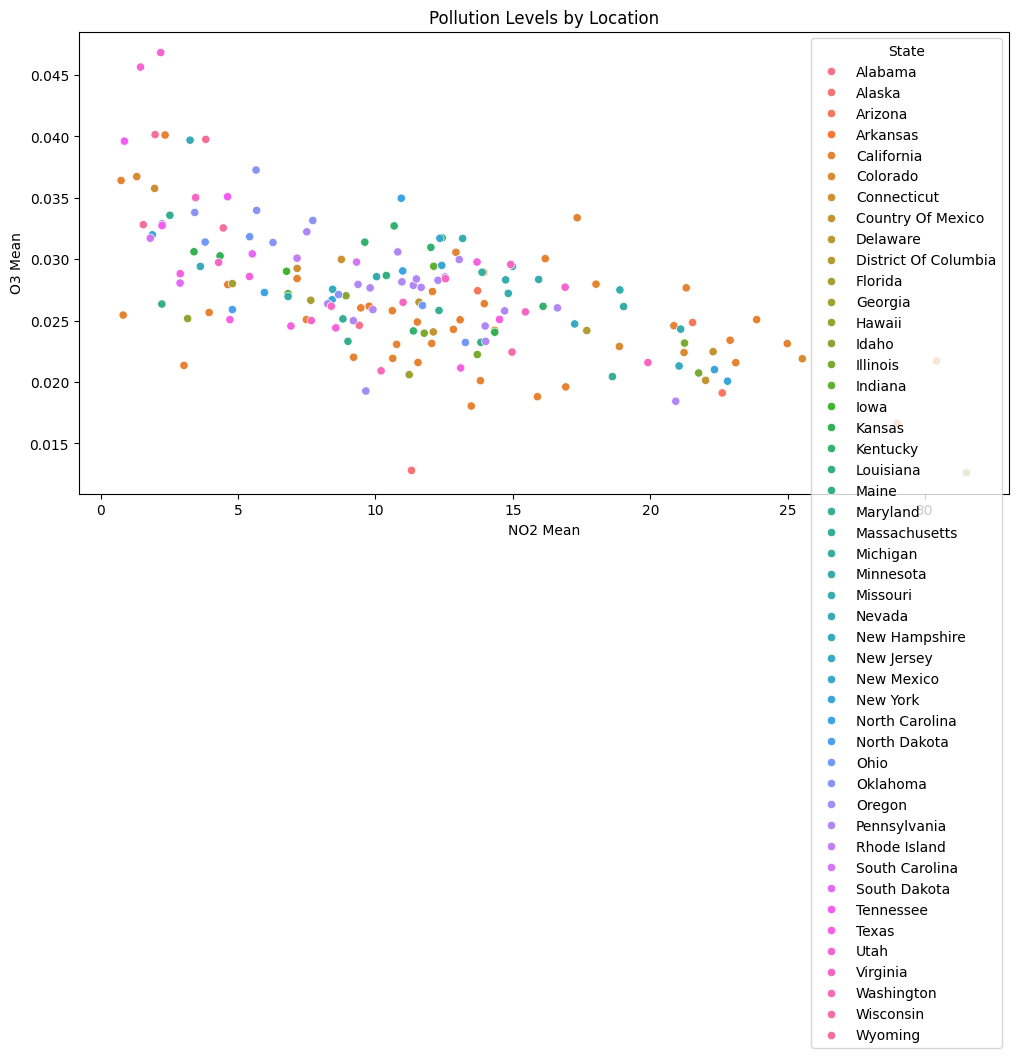

In [21]:
# Group by Location (State, County, City) and Plot Pollution Levels
data_by_location = data_cleaned.groupby(['State', 'County', 'City'])[['NO2 Mean', 'O3 Mean']].mean().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a scatter plot
sns.scatterplot(data=data_by_location, x='NO2 Mean', y='O3 Mean', hue='State')

plt.title('Pollution Levels by Location')
plt.xlabel('NO2 Mean')
plt.ylabel('O3 Mean')

# Show the plot
plt.show()

 The graph shows a big range in NO2 and O3 mean values across locations.

States/cities in the top-right quadrant have the highest NO2 and O3 levels.

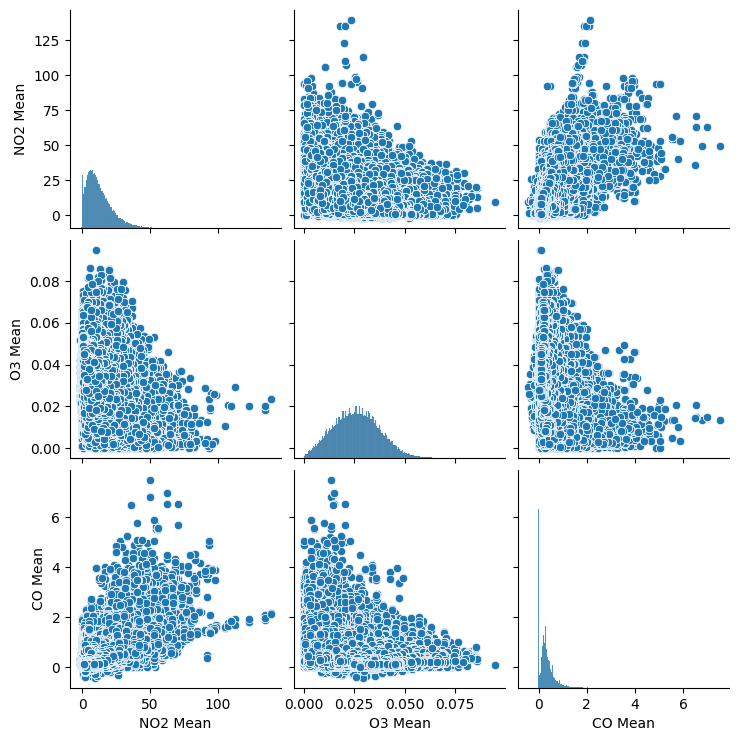

In [22]:
# Pairplot of Pollutants
sns.pairplot(data_cleaned[['NO2 Mean', 'O3 Mean', 'CO Mean']])
plt.show()

There is a plot that shows a positive correlation between NO2 Mean and CO Mean, with higher values of one corresponding to higher values of the other.

The top-middle plot indicates a negative correlation between NO2 Mean and O3 Mean, where higher NO2 levels are associated with lower O3 levels.

The bottom-left plot suggests a positive, but more scattered, relationship between NO2 Mean and CO Mean.

The bottom-middle plot reveals a narrower, negative correlation between O3 Mean and CO Mean.


# Air Quality Index Calculation and Categorization

In [23]:
# Calculate Air Quality Index and Categorize
data_cleaned = data_cleaned.copy()
data_cleaned['Air Quality Index'] = (data_cleaned['NO2 Mean'] + data_cleaned['O3 Mean'] + data_cleaned['CO Mean']) / 3
data_cleaned['Air Quality Category'] = pd.cut(data_cleaned['Air Quality Index'], bins=[-1, 50, 100, 150, 200, float('inf')],
                                   labels=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Hazardous'])

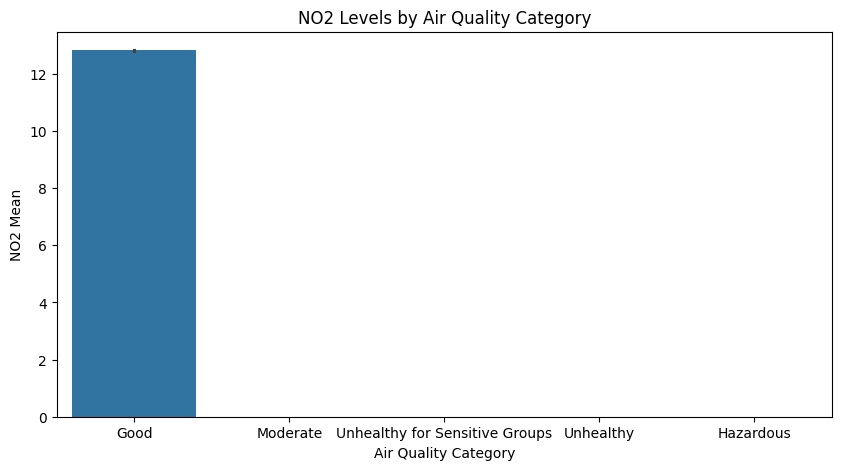

In [24]:
# Plot NO2 Levels by Air Quality Category
plt.figure(figsize=(10, 5))
sns.barplot(x='Air Quality Category', y='NO2 Mean', data=data_cleaned)
plt.title('NO2 Levels by Air Quality Category')
plt.xlabel('Air Quality Category')
plt.ylabel('NO2 Mean')
plt.show()

The graph shows that the "Good" air quality category has the highest average NO2 level, around 12 units.

This indicates a strong relationship between NO2 pollution and overall air quality.

# Correlation Analysis

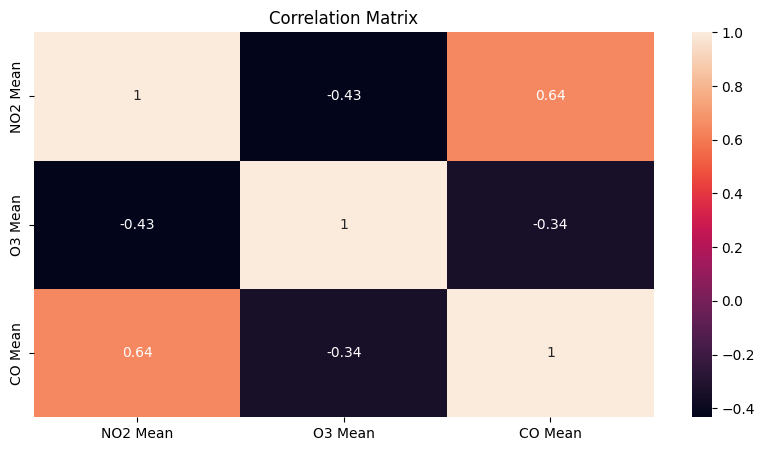

In [25]:
# Correlation Matrix Heatmap
correlation_matrix = data_cleaned[['NO2 Mean', 'O3 Mean', 'CO Mean']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix')
plt.show()


The correlation matrix reveals the strongest positive relationship is between NO2 Mean and CO Mean, while NO2 Mean and O3 Mean have a moderate neg correlation. O3 Mean and CO Mean also exhibit a moderate negative correlation, but to a lesser degree.

# Monthly Analysis

In [26]:
# Extract month from 'Date Local' column
data_cleaned = data_cleaned.copy()
data_cleaned['Month'] = data_cleaned['Date Local'].dt.month

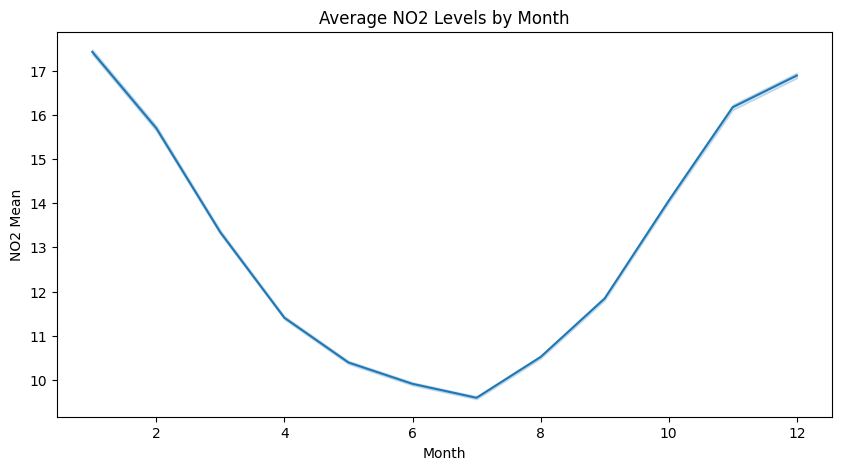

In [27]:
# Plot Average NO2 Levels by Month
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_cleaned, x='Month', y='NO2 Mean')
plt.title('Average NO2 Levels by Month')
plt.xlabel('Month')
plt.ylabel('NO2 Mean')
plt.show()

Winter (Dec, Jan, Feb): NO2 levels are highest.

Summer (Jun, Jul, Aug): NO2 levels are lowest.

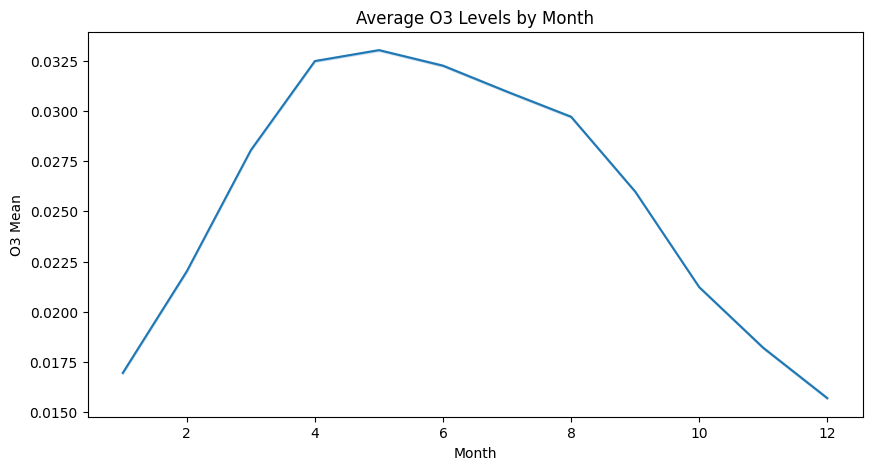

In [28]:
# Plot Average O3 Levels by Month
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_cleaned, x='Month', y='O3 Mean')
plt.title('Average O3 Levels by Month')
plt.xlabel('Month')
plt.ylabel('O3 Mean')
plt.show()

Summer (May, Jun, Jul): O3 levels are highest.

Winter (Dec, Jan, Feb): O3 levels are lowest.

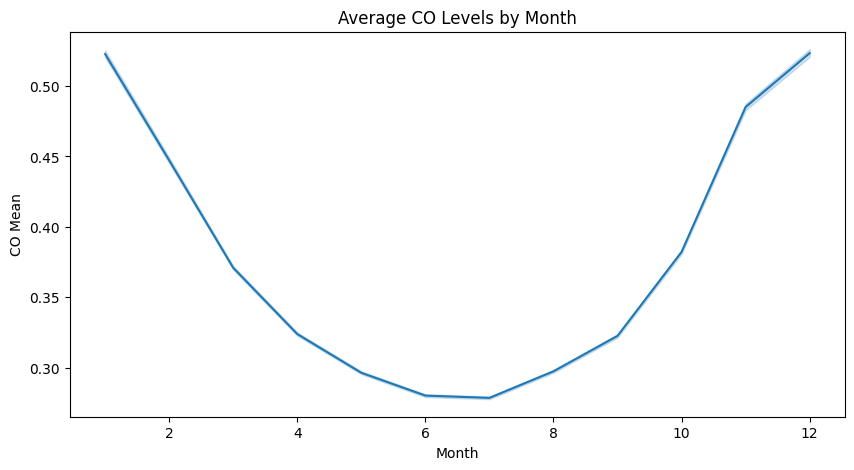

In [29]:
## Plot Average CO Levels by Month
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_cleaned, x='Month', y='CO Mean')
plt.title('Average CO Levels by Month')
plt.xlabel('Month')
plt.ylabel('CO Mean')
plt.show()

Winter (Dec, Jan, Feb): CO levels are highest.

Summer (Jun, Jul, Aug): CO levels are lowest.

# Yearly Trend Analysis

In [30]:
data_cleaned['Year'] = data_cleaned['Date Local'].dt.year

In [31]:
# Group by Year and Calculate Mean Pollutant Levels
yearly_data = data_cleaned.groupby('Year')[['NO2 Mean', 'O3 Mean', 'CO Mean']].mean().reset_index()

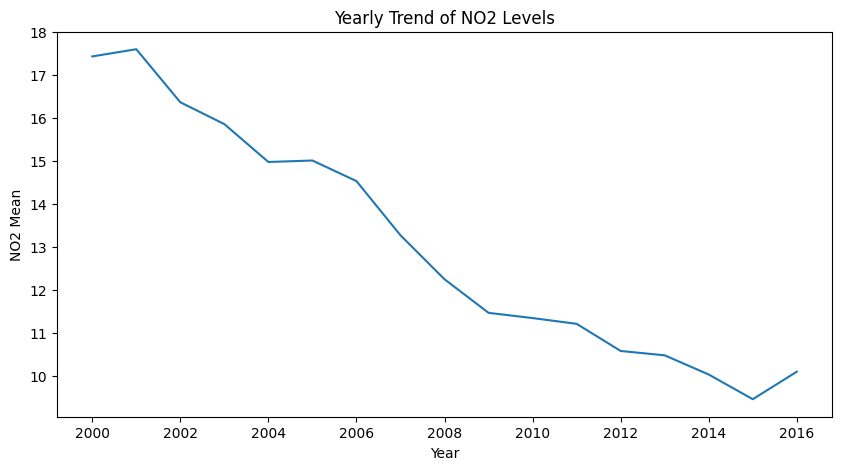

In [32]:
# Plot Yearly Trend of NO2 Levels
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_data, x='Year', y='NO2 Mean')
plt.title('Yearly Trend of NO2 Levels')
plt.xlabel('Year')
plt.ylabel('NO2 Mean')
plt.show()

NO2 levels have consistently decreased from 2000 to 2016, starting at 17 units and declining to around 10 units by 2016.

Yearly analysis reveals a consistent downward trend in NO2 levels, indicating a gradual improvement in air quality.

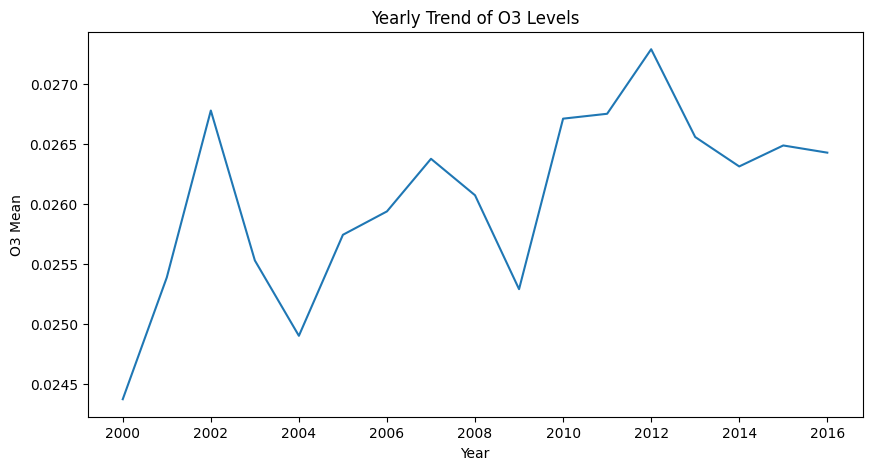

In [33]:
# Plot Yearly Trend of O3 Levels
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_data, x='Year', y='O3 Mean')
plt.title('Yearly Trend of O3 Levels')
plt.xlabel('Year')
plt.ylabel('O3 Mean')
plt.show()

This pattern persists from 2000 to 2016, indicating variability in ozone levels over time.

Significant fluctuations are observed in O3 levels on the graph, with some years showing exceptionally high levels and others experiencing deep declines.

Despite the fluctuations, there is no significant overall change in O3 levels observed from the beginning of 2000 to the end of 2016.

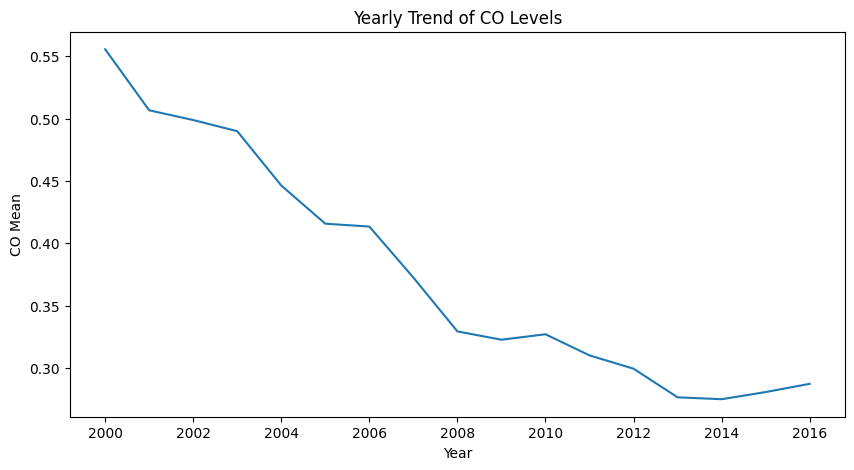

In [34]:
# Plot Yearly Trend of CO Levels
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_data, x='Year', y='CO Mean')
plt.title('Yearly Trend of CO Levels')
plt.xlabel('Year')
plt.ylabel('CO Mean')
plt.show()

# Analysis by Day of the Week

In [35]:
# Add Day of the Week Column
data_cleaned['Day of Week'] = data_cleaned['Date Local'].dt.day_name()

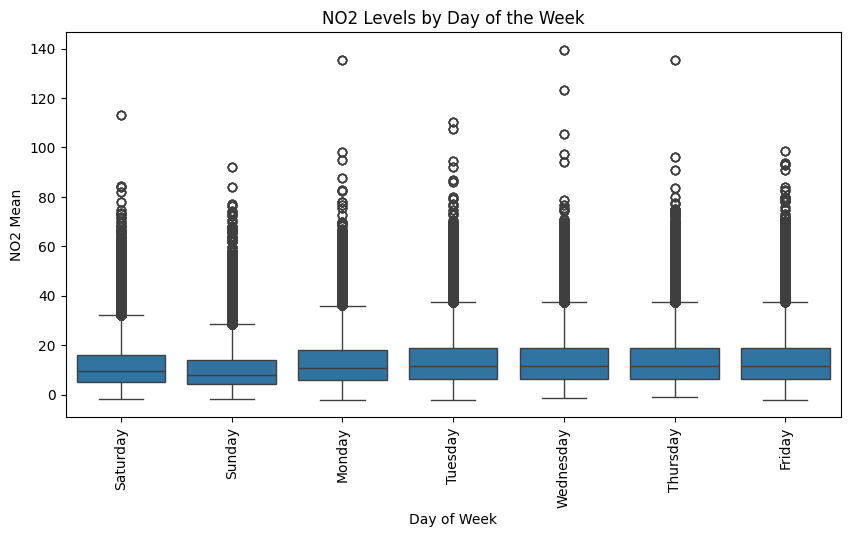

In [36]:
## Plot NO2 Levels by Day of the Week
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_cleaned, x='Day of Week', y='NO2 Mean')
plt.title('NO2 Levels by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('NO2 Mean')
plt.xticks(rotation=90)
plt.show()

The graph illustrates that NO2 levels are higher on weekdays or workdays, such as Monday to Friday.

Conversely, NO2 levels decrease significantly on weekends, particularly on Saturday and Sunday.

This pattern suggests that activities like traffic, factory operations, and other industrial/commercial activities contribute to higher NO2 levels during weekdays.
As the weekend arrives, these activities decrease, leading to a reduction in NO2 levels.

The graph shows that NO2 levels during weekdays reach around 100 units, while they drop below 50 units during the weekend.

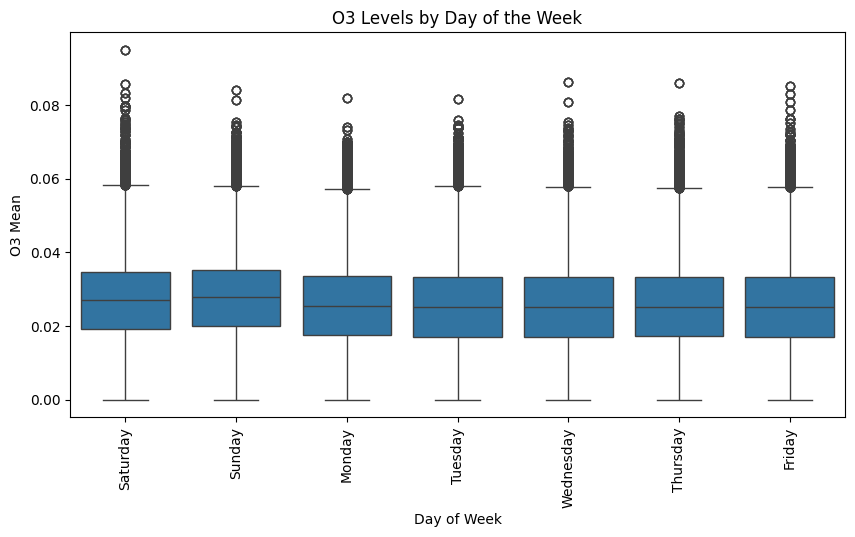

In [37]:
# Plot O3 Levels by Day of the Week
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_cleaned, x='Day of Week', y='O3 Mean')
plt.title('O3 Levels by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('O3 Mean')
plt.xticks(rotation=90)
plt.show()

the graph indicates that O3 levels are higher on Saturdays and Sundays, whereas they are lower on weekdays.

Lower vehicle activity leads to decreased emissions of NOx (nitrogen oxides), essential for O3 formation.

City
Chicago             31.505439
Burbank             30.415464
Bakersfield         28.987914
Denver              25.531392
Hawthorne           24.983751
West Los Angeles    23.869976
Long Beach          23.109647
Los Angeles         22.903726
Scottsdale          22.616994
New York            22.564132
Name: NO2 Mean, dtype: float64


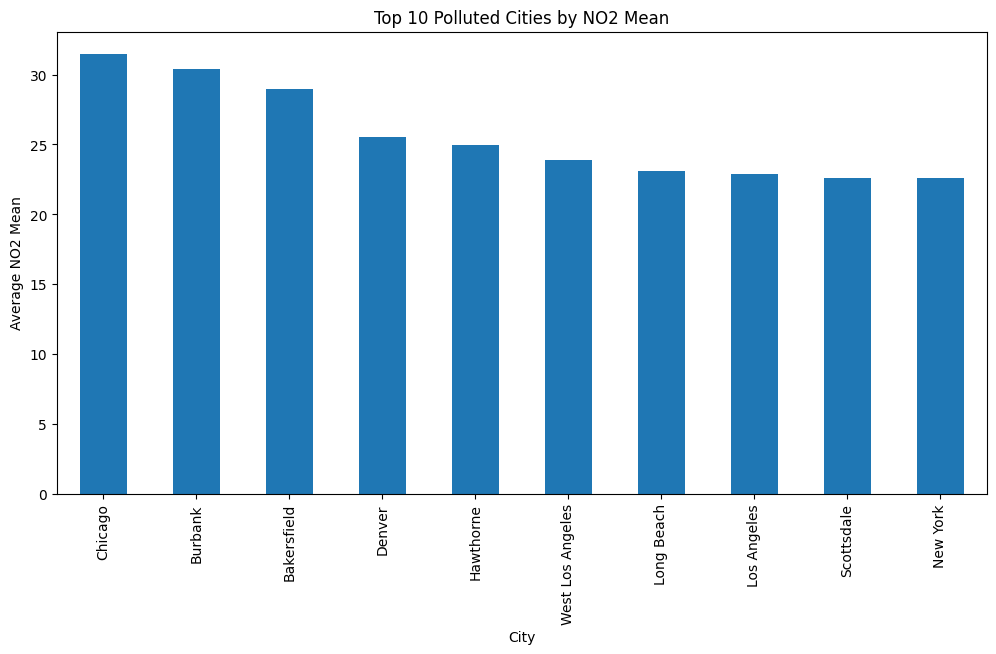

In [38]:
# Analyzing the top 10 polluted cities by NO2 mean.
top_polluted_cities = data_cleaned.groupby('City')['NO2 Mean'].mean().sort_values(ascending=False).head(10)
print(top_polluted_cities)

plt.figure(figsize=(12, 6))
top_polluted_cities.plot(kind='bar')
plt.title('Top 10 Polluted Cities by NO2 Mean')
plt.xlabel('City')
plt.ylabel('Average NO2 Mean')
plt.show()

In [39]:
# Comparing pollution levels between California and New York.
state_comparison = data_cleaned[data_cleaned['State'].isin(['California', 'New York'])]

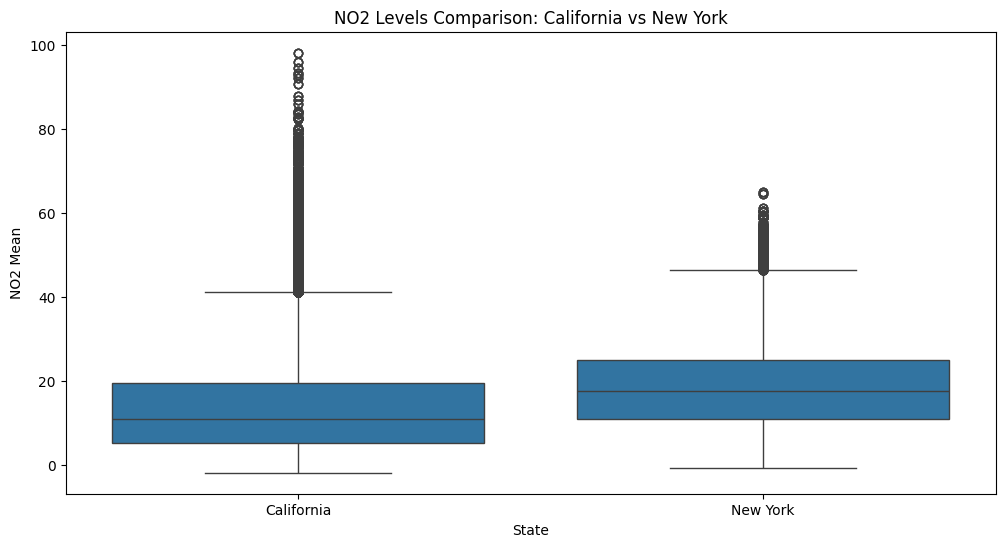

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=state_comparison, x='State', y='NO2 Mean')
plt.title('NO2 Levels Comparison: California vs New York')
plt.xlabel('State')
plt.ylabel('NO2 Mean')
plt.show()

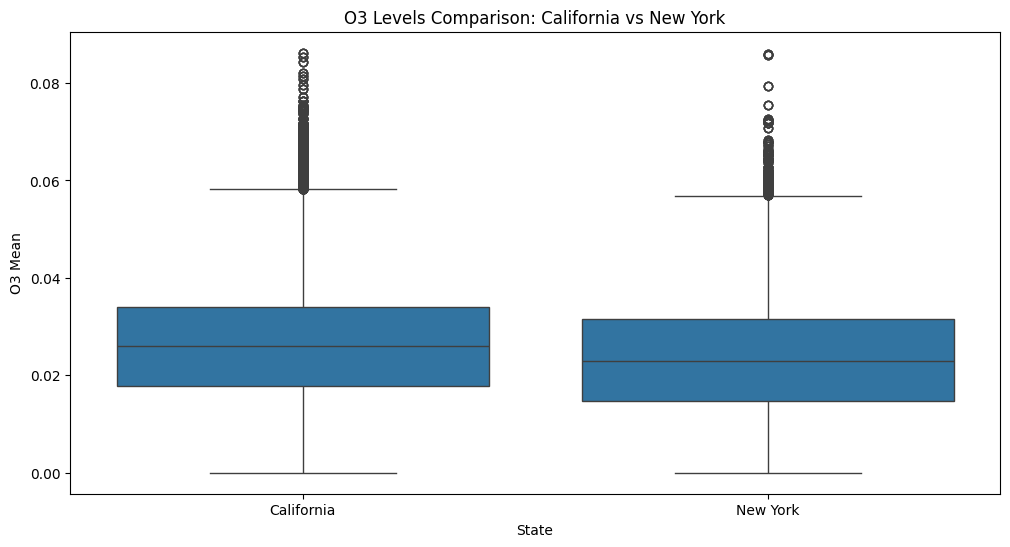

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=state_comparison, x='State', y='O3 Mean')
plt.title('O3 Levels Comparison: California vs New York')
plt.xlabel('State')
plt.ylabel('O3 Mean')
plt.show()

 # Simple linear regression

In [42]:
# Simple Linear Regression to Predict NO2 Mean
X = data_cleaned[['O3 Mean', 'CO Mean']]
y = data_cleaned['NO2 Mean'] #dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [43]:
# Make predictions
y_pred = model.predict(X_test)

In [44]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 48.166971816210136
R^2 Score: 0.4661275541150053


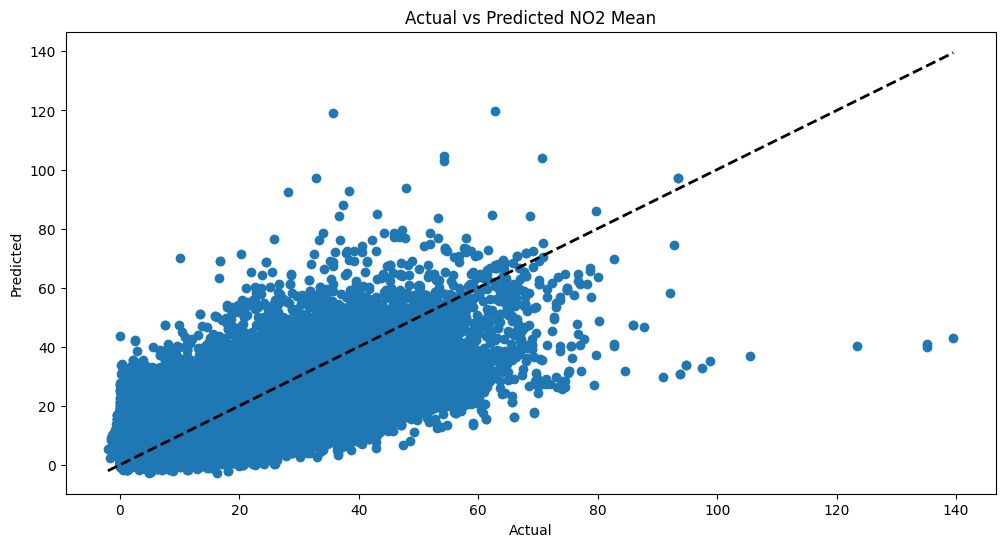

In [45]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted NO2 Mean')
plt.show()

In [49]:
# Define the feature matrix and target vector
X = data[['O3 Mean', 'CO Mean']]  # Features
y = data['NO2 Mean']  # Target

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=0),
}

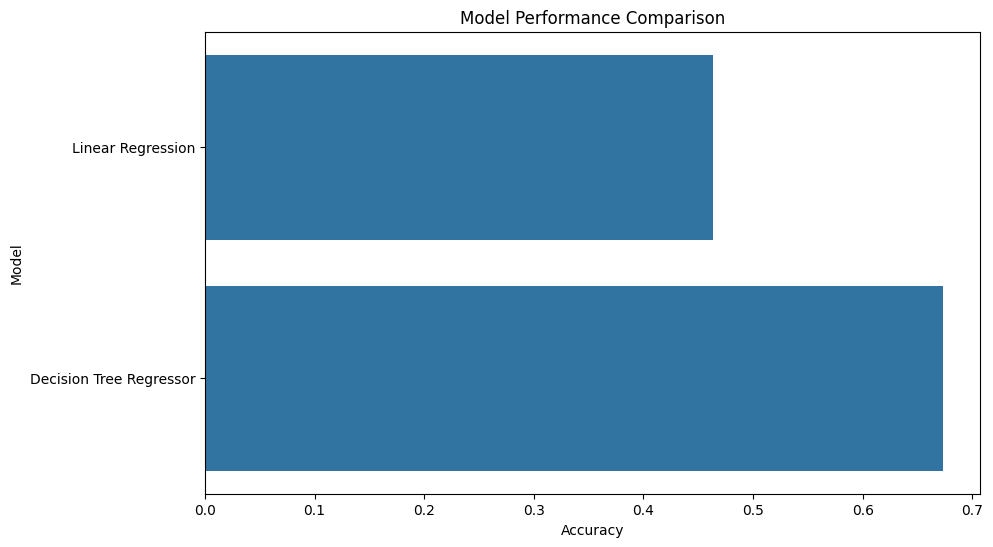

In [52]:
# Visualize results
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df)
plt.title("Model Performance Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=0),
}
# Train and evaluate models
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    try:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = model.score(x_test, y_test)
        results[model_name] = score
        print(f"{model_name} Accuracy: {score:.4f}")
    except Exception as e:
        print(f"Failed to process {model_name}: {e}")

Training Linear Regression...
Linear Regression Accuracy: 0.4636
Training Decision Tree Regressor...
Decision Tree Regressor Accuracy: 0.6732
